###                       MOVIE BUSINESS ANALYSIS
####          1.0  Business  Problem
In recent years, major companies have expanded into original video content, and our company is eager to follow suit by launching a new movie studio. However, with limited experience in the film industry, strategic guidance is essential.

To support this initiative, We have been tasked with conducting exploratory data analysis (EDA) on a variety of movie industry datasets. The goal is to uncover trends and insights into what types of films perform best at the box office. This analysis will inform key decisions about what genres, budgets, and release strategies our new studio should prioritize to maximize success and profitability.



#### 2.0 Data Overview
To perform a comprehensive analysis of the movie industry the data was assemble from the below list of datasets each offering unique and valuable insights:
* IMD Data Base
* Box Office
* Rotten Tomatoes
* The Movie
* The Numbers

The Data contains various information about the film industry which include but not limited to genres,production companies, budgets, revenues,profitability, ratings ,language and popularity scores.


In [526]:
# Impoting the necessary libraries that will enable the reading and cleaning of data for further analysis
import pandas as pd
import sqlite3 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

#### 2.1 bom.movie Analysis
An EDA for this dataset is done below to enable us understand the nature and importance of each column for further analysis.


In [527]:
#data_loc = "zippedData\bom.movie_gross.csv.gz"
data_loc1 =r"C:\Users\Chumba\Documents\Phase 2\Group3-End-of-Phase2-Project\zippedData\bom.movie_gross.csv.gz"
BOM_df = pd.read_csv(data_loc1, compression='gzip')

In [528]:
BOM_df.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [529]:
BOM_df.describe()

,domestic_gross,year
count,3.359000e+03,3387.000000
mean,2.874585e+07,2013.958075
std,6.698250e+07,2.478141
min,1.000000e+02,2010.000000
25%,1.200000e+05,2012.000000
50%,1.400000e+06,2014.000000
75%,2.790000e+07,2016.000000
max,9.367000e+08,2018.000000


In [530]:
# 1. Overview of the dataframe
print("Basic Info:")
print(BOM_df.info(), "\n")

# 2. Checking for missing values
print(" Missing Values:")
print(BOM_df.isnull().sum(), "\n")

# 3. Checking for duplicate titles
print(" Duplicate Titles:")
duplicate_titles = BOM_df[BOM_df.duplicated(subset='title', keep=False)]
print(duplicate_titles[['title', 'year']], "\n")

# 4. Checking data type of 'foreign_gross' and example values
print(" Data Type of 'foreign_gross':", BOM_df['foreign_gross'].dtype)
print(" Sample foreign_gross values:")
print(BOM_df['foreign_gross'].dropna().sample(5).values, "\n")

# 5. Checking for special characters in 'foreign_gross' (like commas or currency signs)
import re
sample_fg = BOM_df['foreign_gross'].dropna().astype(str)
if sample_fg.str.contains(r'[^\d.]').any():
    print(" foreign_gross contains non-numeric characters (e.g., commas, symbols).")
else:
    print(" foreign_gross appears numeric.")

Basic Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB
None 

 Missing Values:
title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64 

 Duplicate Titles:
          title  year
317   Bluebeard  2010
3045  Bluebeard  2017 

 Data Type of 'foreign_gross': object
 Sample foreign_gross values:
['6300000' '422000' '102000' '1100000' '25100000'] 

 foreign_gross contains non-numeric characters (e.g., commas, symbols).


In [531]:
# Calculate number and percentage of missing values per column
missing_counts = BOM_df.isnull().sum()
missing_percent = (missing_counts / len(BOM_df)) * 100

# Combine into a single DataFrame for better readability
missing_summary = pd.DataFrame({
    'Missing Values': missing_counts,
    'Total Entries': len(BOM_df),
    '% Missing': missing_percent.round(2)
})

# Display the summary
print(missing_summary)


                Missing Values  Total Entries  % Missing
title                        0           3387       0.00
studio                       5           3387       0.15
domestic_gross              28           3387       0.83
foreign_gross             1350           3387      39.86
year                         0           3387       0.00


#### 2.11 Summary Findings BOM dataset.
* Total movies: 3,387

 * Columns:

 * title: Movie title

 * studio: Studio name (5 missing)

 * domestic_gross: U.S. box office revenue (28 missing)

 * foreign_gross: International box office revenue (1,350 missing, stored as text)

 * year: Release year (no missing values)



#### 2.12 Data Cleaning
Raw data is often messy and incomplete, which can lead to misleading analysis and poor insights. **Data cleaning** is the process of detecting and correcting (or removing) errors and inconsistencies in a dataset to improve its quality and reliability.

In this project, data cleaning is essential to ensure accurate analysis of movie performance. The main cleaning steps include:

- **Handling missing values**: Dropping or imputing records with missing box office figures or studio information.
- **Fixing formatting issues**: Removing non-numeric characters (e.g., commas, currency symbols) from financial columns so they can be analyzed as numbers.
- **Removing duplicates**: Ensuring each movie is uniquely represented to avoid skewed results.
- **Creating new features**: Generating a `total_gross` column by combining domestic and foreign earnings to measure total movie performance.

Effective cleaning transforms raw data into a structured and reliable form, allowing us to explore trends, answer business questions, and support decision-making with confidence.

In [532]:
# 1. Remove commas and symbols from 'foreign_gross', convert to float
BOM_df['foreign_gross'] = BOM_df['foreign_gross'].replace(r'[\$,]', '', regex=True)
BOM_df['foreign_gross'] = pd.to_numeric(BOM_df['foreign_gross'], errors='coerce')

# 2. Drop rows with missing key financial data (domestic_gross or foreign_gross)
BOM_df_clean = BOM_df.dropna(subset=['domestic_gross', 'foreign_gross'])

# 3. Optionally drop rows with missing studio info (if you care about studio analysis)
BOM_df_clean = BOM_df_clean.dropna(subset=['studio'])

# 4. Remove duplicate movies based on title and year
BOM_df_clean = BOM_df_clean.drop_duplicates(subset=['title', 'year'])

# 5. Create a new column for total box office revenue
BOM_df_clean['total_gross'] = BOM_df_clean['domestic_gross'] + BOM_df_clean['foreign_gross']

# 6. Keep only the most relevant columns for analysis
BOM_df_final = BOM_df_clean[['title', 'studio', 'year', 'domestic_gross', 'foreign_gross', 'total_gross']]

# 7. Reset index for a clean look
BOM_df_final.reset_index(drop=True, inplace=True)

# Display the cleaned dataset
BOM_df_final.head()

,title,studio,year,domestic_gross,foreign_gross,total_gross
0,Toy Story 3,BV,2010,415000000.0,652000000.0,1.067000e+09
1,Alice in Wonderland (2010),BV,2010,334200000.0,691300000.0,1.025500e+09
2,Harry Potter and the Deathly Hallows Part 1,WB,2010,296000000.0,664300000.0,9.603000e+08
3,Inception,WB,2010,292600000.0,535700000.0,8.283000e+08
4,Shrek Forever After,P/DW,2010,238700000.0,513900000.0,7.526000e+08


In [533]:
BOM_df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2007 entries, 0 to 2006
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           2007 non-null   object 
 1   studio          2007 non-null   object 
 2   year            2007 non-null   int64  
 3   domestic_gross  2007 non-null   float64
 4   foreign_gross   2007 non-null   float64
 5   total_gross     2007 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 94.2+ KB


#### 2.2 Rotten Tomatoes Movie Dataset_Analysis
This section wil carry out an analysis of our next dataset mention above. To do an EDA and come up with final dataframe for analysis.



In [534]:
# Reading data from rt.movie into a dataframe
data_loc2 =r"C:\Users\Chumba\Documents\Phase 2\Group3-End-of-Phase2-Project\zippedData\rt.movie_info.tsv.gz"
rtmovie_df = pd.read_csv(data_loc2, sep='\t', compression='gzip')

In [535]:
rtmovie_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       1530 non-null   object
 11  studio        494 non-null    object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB


In [536]:
# Show missing values per column
missing = rtmovie_df.isnull().sum().sort_values(ascending=False)
missing_percent = (missing / len(rtmovie_df)) * 100
missing_data = pd.DataFrame({'Missing Count': missing, 'Missing %': missing_percent})
print(missing_data)


              Missing Count  Missing %
currency               1220  78.205128
box_office             1220  78.205128
studio                 1066  68.333333
writer                  449  28.782051
theater_date            359  23.012821
dvd_date                359  23.012821
director                199  12.756410
synopsis                 62   3.974359
runtime                  30   1.923077
genre                     8   0.512821
rating                    3   0.192308
id                        0   0.000000


In [537]:
# Converting dates to Datetime
rtmovie_df['theater_date'] = pd.to_datetime(rtmovie_df['theater_date'], errors='coerce')
rtmovie_df['dvd_date'] = pd.to_datetime(rtmovie_df['dvd_date'], errors='coerce')

# Cleaning runtime to extract minutes (assuming format like "1 hr 30 min" or "90 min")
def parse_runtime(runtime):
    if pd.isna(runtime):
        return np.nan
    runtime = str(runtime).lower().strip()  # Ensure it's a string and lowercase

    if 'hr' in runtime:
        try:
            parts = runtime.replace('min', '').split('hr')
            hr = int(parts[0].strip()) if parts[0].strip().isdigit() else 0
            min_ = int(parts[1].strip()) if len(parts) > 1 and parts[1].strip().isdigit() else 0
            return hr * 60 + min_
        except:
            return np.nan
    elif 'min' in runtime:
        try:
            return int(runtime.replace('min', '').strip())
        except:
            return np.nan
    else:
        return np.nan

rtmovie_df['runtime_min'] = rtmovie_df['runtime'].apply(parse_runtime)

# Removing currency symbols and commas in the box office column
def parse_box_office(value):
    if pd.isna(value):
        return np.nan
    try:
        return float(value.replace('$', '').replace(',', '').strip())
    except:
        return np.nan

rtmovie_df['box_office_clean'] = rtmovie_df['box_office'].apply(parse_box_office)

# Summary of numerical columns
print("\nNumeric Column Summary (After Cleaning):\n")
print(rtmovie_df[['runtime_min', 'box_office_clean']].describe())

# Drop sparse(high missing) or redundant columns
rtmovie_df_cleaned = rtmovie_df.drop(columns=['studio', 'currency', 'box_office'])



Numeric Column Summary (After Cleaning):

       runtime_min  box_office_clean
count          0.0      3.400000e+02
mean           NaN      3.790601e+07
std            NaN      5.749159e+07
min            NaN      3.630000e+02
25%            NaN      1.905152e+06
50%            NaN      1.414105e+07
75%            NaN      4.482524e+07
max            NaN      3.680000e+08


In [538]:
rtmovie_df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id                1560 non-null   int64         
 1   synopsis          1498 non-null   object        
 2   rating            1557 non-null   object        
 3   genre             1552 non-null   object        
 4   director          1361 non-null   object        
 5   writer            1111 non-null   object        
 6   theater_date      1201 non-null   datetime64[ns]
 7   dvd_date          1201 non-null   datetime64[ns]
 8   runtime           1530 non-null   object        
 9   runtime_min       0 non-null      float64       
 10  box_office_clean  340 non-null    float64       
dtypes: datetime64[ns](2), float64(2), int64(1), object(6)
memory usage: 134.2+ KB


#### 2.21 Rotten Tomatoes Movie Dataset Summary

- Total movies: **1,560**
- Cleaned columns: `theater_date`, `dvd_date` (datetime), `runtime_min`, `box_office_clean`
- Removed columns due to high missing data: `studio`, `currency`, `box_office` at a threshold of 30%
- Box office data available for ~22% of movies further analysis could imply biasness towards successful releases
- Runtime standardized to minutes
- Dataset ready for analysis on runtime, release trends, genre, and partial revenue insights

#### 2.3 Rotten Toamoes Reviews Dataset_Analysis

In [539]:
# Reading data from compressed file rt.reviews file
data_loc3 =r"C:\Users\Chumba\Documents\Phase 2\Group3-End-of-Phase2-Project\zippedData\rt.reviews.tsv.gz"
rtreview_df = pd.read_csv(data_loc3, sep='\t', compression='gzip', encoding='ISO-8859-1')

In [540]:
# Checking the general information about the data
rtreview_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54432 entries, 0 to 54431
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          54432 non-null  int64 
 1   review      48869 non-null  object
 2   rating      40915 non-null  object
 3   fresh       54432 non-null  object
 4   critic      51710 non-null  object
 5   top_critic  54432 non-null  int64 
 6   publisher   54123 non-null  object
 7   date        54432 non-null  object
dtypes: int64(2), object(6)
memory usage: 3.3+ MB


#### 2.31 Rotten Tomatoes Dataset Summary

This dataset contains **54,432** movie review entries with the following columns:

| Column      | Description                       | Data Type  | Missing Values          |
|-------------|---------------------------------|------------|------------------------|
| `id`        | Unique identifier for each review | int64      | None                   |
| `review`    | Text of the critic's review       | object     | ~5,563 (10%)           |
| `rating`    | Rating given by the critic         | object     | ~13,517 (25%)          |
| `fresh`     | Indicator if review is fresh or rotten | object (categorical) | None                   |
| `critic`    | Name of the critic                 | object     | ~2,722 (5%)            |
| `top_critic`| Binary flag for top critics (0/1) | int64 (binary) | None                   |
| `publisher` | Publisher of the review            | object     | ~309 (0.6%)            |
| `date`      | Date of the review                 | object (datetime recommended) | None                   |

##### Notes:
- The `date` column is currently an object but should be converted to datetime for easier time-based analysis.
- The `fresh` column can be treated as a categorical variable.
- There are missing values in the `review`, `rating`, `critic`, and `publisher` columns that may need to be addressed depending on analysis goals.

#### 2.32 Rotten Tomatoes Reviews Data Cleaning

In [541]:
# Converting 'date' column to datetime
rtreview_df['date'] = pd.to_datetime(rtreview_df['date'])

# Convert 'fresh' column to categorical type
rtreview_df['fresh'] = rtreview_df['fresh'].astype('category')

# Converting 'top_critic' column to boolean
rtreview_df['top_critic'] = rtreview_df['top_critic'].astype(bool)

# Fill missing values with placeholders
rtreview_df['review'] = rtreview_df['review'].fillna('No review provided')
rtreview_df['rating'] = rtreview_df['rating'].fillna('No rating')
rtreview_df['critic'] = rtreview_df['critic'].fillna('Unknown critic')
rtreview_df['publisher'] = rtreview_df['publisher'].fillna('Unknown publisher')

# Check final cleaned dataframe info
print(rtreview_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54432 entries, 0 to 54431
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   id          54432 non-null  int64         
 1   review      54432 non-null  object        
 2   rating      54432 non-null  object        
 3   fresh       54432 non-null  category      
 4   critic      54432 non-null  object        
 5   top_critic  54432 non-null  bool          
 6   publisher   54432 non-null  object        
 7   date        54432 non-null  datetime64[ns]
dtypes: bool(1), category(1), datetime64[ns](1), int64(1), object(4)
memory usage: 2.6+ MB
None


#### 2.4 The Numbers Movie Budgets Dataset Analysis
In this section we shall do an analysis of the above file to understand the nature of the data we are dealing with, do a clean up if need be and to generate insights from the analysis.

In [542]:
# Reading data from the tn.movie csv file
data_loc4 =r"C:\Users\Chumba\Documents\Phase 2\Group3-End-of-Phase2-Project\zippedData\tn.movie_budgets.csv.gz"
tnmovie_df = pd.read_csv(data_loc4, compression='gzip')

In [543]:
# General information about the dataset
tnmovie_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


##### 2.41 The Numbers Movie Dataset Summary

This dataset (`tnmovie_df`) contains information about **5,782** movies, including their release dates, titles, and financial performance. Below is a summary of the columns:

| Column              | Description                                  | Data Type | Missing Values |
|---------------------|----------------------------------------------|-----------|----------------|
| `id`                | Unique identifier for each movie             | int64     | None           |
| `release_date`      | Release date of the movie                    | object (date) | None       |
| `movie`             | Movie title                                  | object    | None           |
| `production_budget` | Production budget (currently as string)      | object (should be numeric) | None |
| `domestic_gross`    | Domestic box office gross (string)           | object (should be numeric) | None |
| `worldwide_gross`   | Worldwide box office gross (string)          | object (should be numeric) | None |

##### Notes:
- The dataset has **no missing values**.
- Financial columns (`production_budget`, `domestic_gross`, `worldwide_gross`) are currently stored as strings, likely due to currency symbols and commas. These should be cleaned and converted to numeric types for analysis.
- `release_date` should be converted to `datetime` format to support time-based analysis (e.g., trends over time).

#### 2.42 The Numbers Movie Data Cleaning
From the summary of the data findings above, a further cleaning is required on the columns stated as Production_budget,domestic_gross_worldwide gross which have taken the nature of strings but require to be converted to numbers and release_date to datetime.

In [544]:
# Convert release_date to datetime
tnmovie_df['release_date'] = pd.to_datetime(tnmovie_df['release_date'])

# Function to clean currency columns
def clean_currency(col):
    return pd.to_numeric(col.replace(r'[\$,]', '', regex=True))

# Apply to budget and gross columns
currency_columns = ['production_budget', 'domestic_gross', 'worldwide_gross']
for col in currency_columns:
    tnmovie_df[col] = clean_currency(tnmovie_df[col])

# Optional: Check the result
print(tnmovie_df.dtypes)
print(tnmovie_df.head())

id                            int64
release_date         datetime64[ns]
movie                        object
production_budget             int64
domestic_gross                int64
worldwide_gross               int64
dtype: object
   id release_date                                        movie  \
0   1   2009-12-18                                       Avatar   
1   2   2011-05-20  Pirates of the Caribbean: On Stranger Tides   
2   3   2019-06-07                                 Dark Phoenix   
3   4   2015-05-01                      Avengers: Age of Ultron   
4   5   2017-12-15            Star Wars Ep. VIII: The Last Jedi   

   production_budget  domestic_gross  worldwide_gross  
0          425000000       760507625       2776345279  
1          410600000       241063875       1045663875  
2          350000000        42762350        149762350  
3          330600000       459005868       1403013963  
4          317000000       620181382       1316721747  


#### 2.43 VISUALIZATIONS
* Production Budget vs Worldwide Gross 


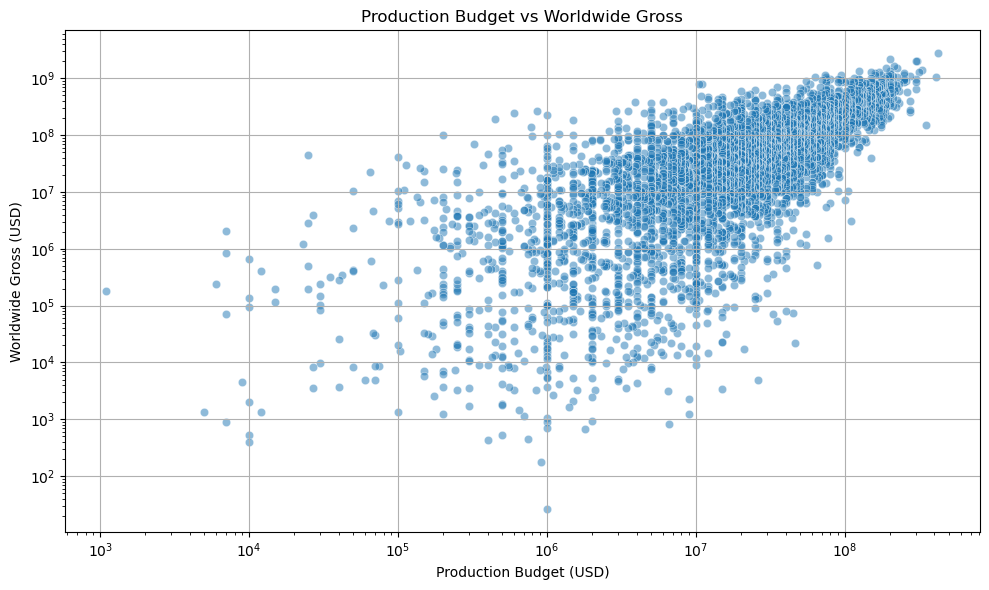

In [545]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=tnmovie_df, x='production_budget', y='worldwide_gross', alpha=0.5)
plt.title('Production Budget vs Worldwide Gross')
plt.xlabel('Production Budget (USD)')
plt.ylabel('Worldwide Gross (USD)')
plt.xscale('log')
plt.yscale('log')
plt.grid(True)
plt.tight_layout()
plt.show()

* Total Worldwide Gross by Year

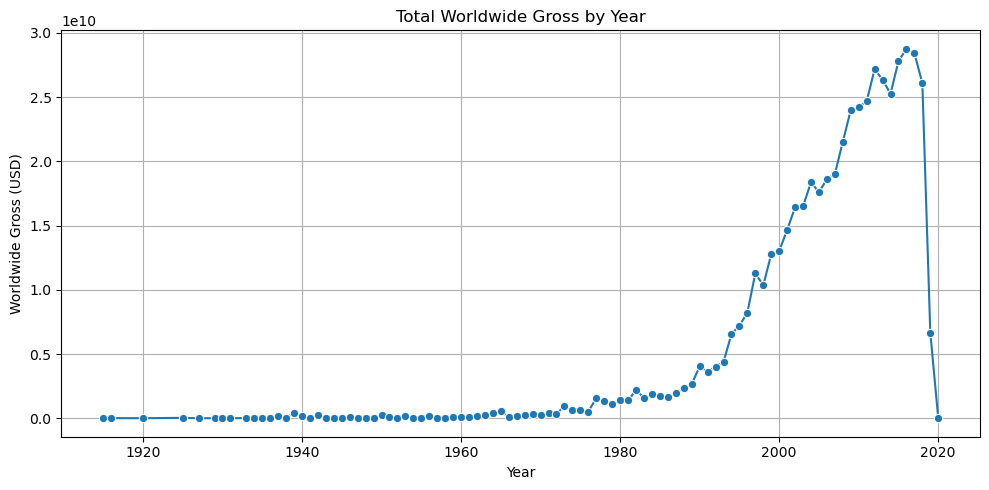

In [546]:
 #Create a new column for release year
tnmovie_df['release_year'] = tnmovie_df['release_date'].dt.year

# Group by year and sum the worldwide gross
yearly_gross = tnmovie_df.groupby('release_year')['worldwide_gross'].sum().reset_index()

plt.figure(figsize=(10, 5))
sns.lineplot(data=yearly_gross, x='release_year', y='worldwide_gross', marker='o')
plt.title('Total Worldwide Gross by Year')
plt.xlabel('Year')
plt.ylabel('Worldwide Gross (USD)')
plt.grid(True)
plt.tight_layout()
plt.show()


* ROI Calculations and Distribution

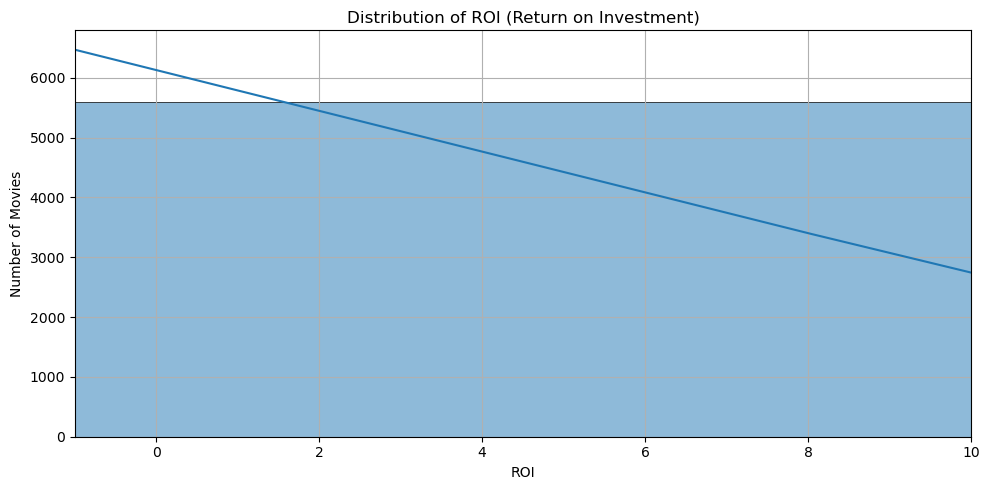

In [547]:
# Add ROI column: (worldwide - budget) / budget
tnmovie_df['ROI'] = (tnmovie_df['worldwide_gross'] - tnmovie_df['production_budget']) / tnmovie_df['production_budget']

# Plot ROI distribution
plt.figure(figsize=(10, 5))
sns.histplot(tnmovie_df['ROI'], bins=100, kde=True)
plt.xlim(-1, 10)  # Limit extreme outliers for clearer visualization
plt.title('Distribution of ROI (Return on Investment)')
plt.xlabel('ROI')
plt.ylabel('Number of Movies')
plt.grid(True)
plt.tight_layout()
plt.show()

#### 2.5 The Movie Data Analysis

In [548]:
data_loc5 =r"C:\Users\Chumba\Documents\Phase 2\Group3-End-of-Phase2-Project\zippedData\tmdb.movies.csv.gz"
Themovie_df = pd.read_csv(data_loc5, compression='gzip')

In [549]:
Themovie_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         26517 non-null  int64  
 1   genre_ids          26517 non-null  object 
 2   id                 26517 non-null  int64  
 3   original_language  26517 non-null  object 
 4   original_title     26517 non-null  object 
 5   popularity         26517 non-null  float64
 6   release_date       26517 non-null  object 
 7   title              26517 non-null  object 
 8   vote_average       26517 non-null  float64
 9   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB


#### 2.51 The Movie Data Summary

- Contains 26,517 movies with metadata such as titles, languages, popularity, ratings, and genres.
- `genre_ids` are stored as strings representing lists and need to be parsed into actual Python lists.
- `release_date` is currently a string and should be converted to datetime format.
- `Unnamed: 0` is an unnecessary index column that can be dropped.
- Cleaning these columns will prepare the dataset for effective analysis.








##### 2.511 TM Data Cleaning

In [550]:
import ast

# Drop the unnecessary index column
Themovie_df = Themovie_df.drop(columns=['Unnamed: 0'])

# Convert 'release_date' to datetime, coercing errors to NaT
Themovie_df['release_date'] = pd.to_datetime(Themovie_df['release_date'], errors='coerce')

# Parse 'genre_ids' from string representation of lists to actual lists
Themovie_df['genre_ids'] = Themovie_df['genre_ids'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

# Check for missing values after conversion (optional)
print(Themovie_df.isnull().sum())

genre_ids            0
id                   0
original_language    0
original_title       0
popularity           0
release_date         0
title                0
vote_average         0
vote_count           0
dtype: int64


In [551]:
Themovie_df.columns

Index(['genre_ids', 'id', 'original_language', 'original_title', 'popularity',
       'release_date', 'title', 'vote_average', 'vote_count'],
      dtype='object')

In [552]:
Themovie_df.info


<bound method DataFrame.info of                  genre_ids      id original_language  \
0          [12, 14, 10751]   12444                en   
1      [14, 12, 16, 10751]   10191                en   
2            [12, 28, 878]   10138                en   
3          [16, 35, 10751]     862                en   
4            [28, 878, 12]   27205                en   
...                    ...     ...               ...   
26512             [27, 18]  488143                en   
26513             [18, 53]  485975                en   
26514         [14, 28, 12]  381231                en   
26515      [10751, 12, 28]  366854                en   
26516             [53, 27]  309885                en   

                                     original_title  popularity release_date  \
0      Harry Potter and the Deathly Hallows: Part 1      33.533   2010-11-19   
1                          How to Train Your Dragon      28.734   2010-03-26   
2                                        Iron Man 2    

#### The Movie Visualizations


* Top 8 Genres By Average Popolarity and Vote Average

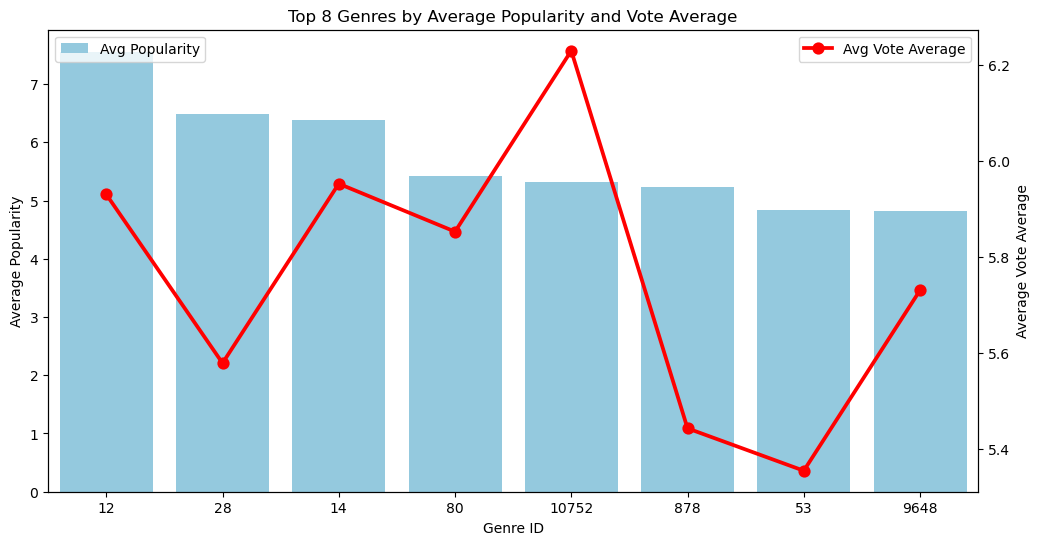

In [553]:
# Explode genre_ids to one genre per row
df_exploded = Themovie_df.explode('genre_ids')

# Aggregate metrics by genre
genre_stats = df_exploded.groupby('genre_ids').agg({
    'popularity': 'mean',
    'vote_average': 'mean',
    'id': 'count'  # number of movies per genre
}).rename(columns={'id': 'movie_count'}).sort_values(by='popularity', ascending=False)

# Take top 8 genres by popularity
top_genres = genre_stats.head(8)

# Plotting
fig, ax1 = plt.subplots(figsize=(12, 6))

sns.barplot(x=top_genres.index.astype(str), y=top_genres['popularity'], color='skyblue', label='Avg Popularity', ax=ax1)
ax1.set_ylabel('Average Popularity')
ax1.set_xlabel('Genre ID')
ax1.set_title('Top 8 Genres by Average Popularity and Vote Average')

ax2 = ax1.twinx()
sns.pointplot(x=top_genres.index.astype(str), y=top_genres['vote_average'], color='red', label='Avg Vote Average', ax=ax2)
ax2.set_ylabel('Average Vote Average')

ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()


* The blue bars show which genres have the highest average popularity (proxy for box office interest).

* The red points show the average audience ratings for those genres.

* We can identify genres that balance high popularity with strong audience approval which in our case genre 12(Adventure) and genre 10752(War) seems to strike a balance.

* Average Popularity by Original Language

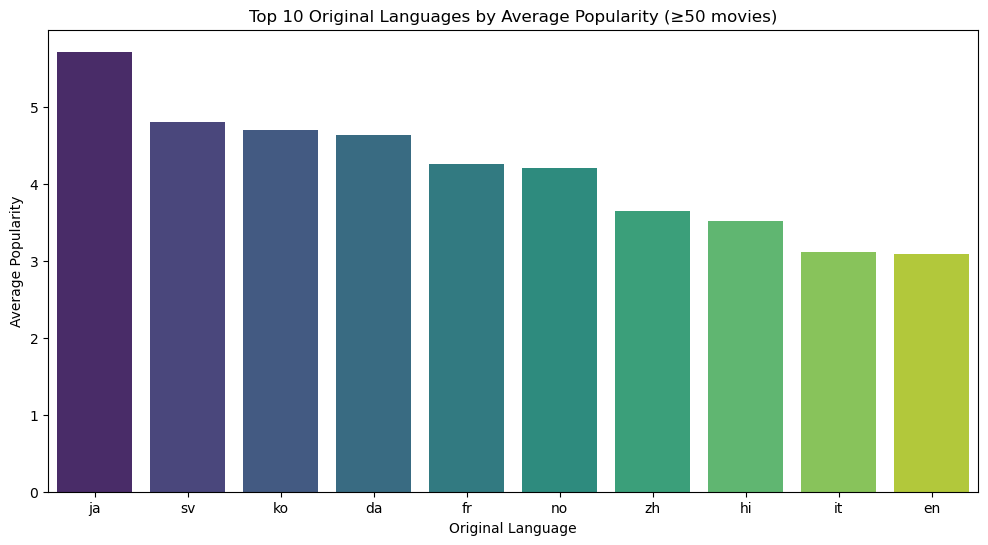

In [554]:
# Aggregate average popularity and vote_average by original_language
language_stats = Themovie_df.groupby('original_language').agg({
    'popularity': 'mean',
    'vote_average': 'mean',
    'id': 'count'  # number of movies per language
}).rename(columns={'id': 'movie_count'})

# Filter languages with at least 50 movies for statistical relevance
language_stats_filtered = language_stats[language_stats['movie_count'] >= 50].sort_values(by='popularity', ascending=False).head(10)

plt.figure(figsize=(12,6))
sns.barplot(x=language_stats_filtered.index, y=language_stats_filtered['popularity'], palette='viridis')
plt.title('Top 10 Original Languages by Average Popularity (≥50 movies)')
plt.xlabel('Original Language')
plt.ylabel('Average Popularity')
plt.show()

* Correlation between popularity, vote average, vote count, and movie count

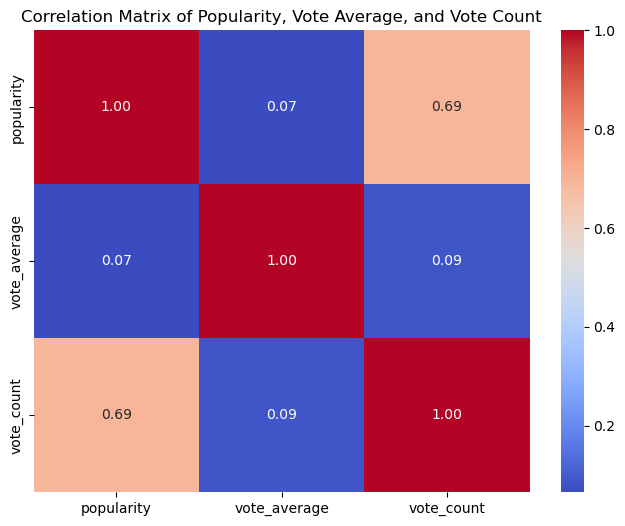

In [555]:
# Select relevant numeric columns
numeric_cols = ['popularity', 'vote_average', 'vote_count']

# Compute correlation matrix
corr_matrix = Themovie_df[numeric_cols].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Popularity, Vote Average, and Vote Count')
plt.show()

* Genre and Language Combined Analysis

Look at how genres perform within top languages. For example, which genres are most popular in English vs. Spanish vs. French films? This can guide localized content strategies.

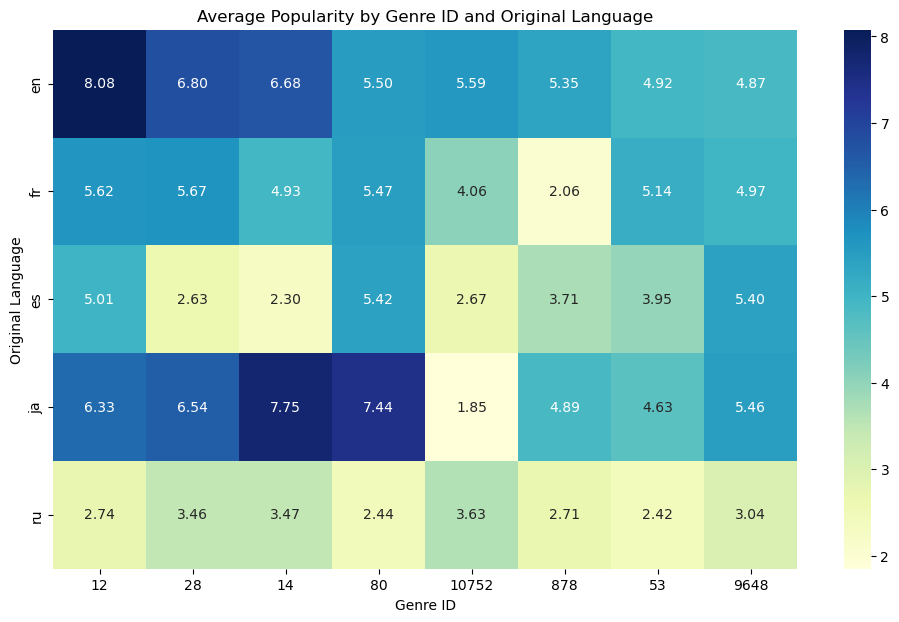

In [556]:
# Explode genre_ids (assumed as lists of IDs)
df_exp = Themovie_df.explode('genre_ids')

# Drop rows with missing genre_ids
df_exp = df_exp[df_exp['genre_ids'].notna()]

# Convert genre_ids to int
df_exp['genre_ids'] = df_exp['genre_ids'].astype(int)

# Filter languages with at least 200 movies
langs = df_exp['original_language'].value_counts()[df_exp['original_language'].value_counts() >= 200].index

# Calculate mean popularity by genre_id and original_language
genre_lang_pop = df_exp[df_exp['original_language'].isin(langs)].groupby(['original_language', 'genre_ids'])['popularity'].mean().unstack()

# Pick top 5 languages and top 8 genres by overall popularity
genre_stats = df_exp.groupby('genre_ids')['popularity'].mean().sort_values(ascending=False)
top_genres = genre_stats.head(8).index

top_langs = langs[:5]

plt.figure(figsize=(12,7))
sns.heatmap(genre_lang_pop.loc[top_langs, top_genres], annot=True, fmt=".2f", cmap='YlGnBu')
plt.title('Average Popularity by Genre ID and Original Language')
plt.xlabel('Genre ID')
plt.ylabel('Original Language')
plt.show()

### Importance of Genre and Language Popularity Analysis

- Identifies top-performing genres within specific language markets, enabling tailored movie production.
- Informs localization strategy by highlighting popular genres in non-English languages.
- Optimizes budget and marketing focus on high-popularity genre-language combinations.
- Reveals underserved genre-language niches for potential competitive advantage.
- Provides data-driven insights to guide production decisions, reducing risk and maximizing box office success.

This analysis helps the new studio create targeted, audience-preferred films across different markets, directly supporting the company's goal to succeed in original content creation.

#####  Insights for Decision-Making
* en = English
* fr = French
* es = Spanish
* ja = Japanese
* ru = Russian
- **English** and **Japanese** content appears to perform best across most genres.
- **Genre ID 12** (Adventure) is a safe high-popularity genre across languages.
- Avoid producing:
  - **Sci-Fi (Genre ID 878)** in **French**, and
  - **War (Genre ID 10752)** in **Japanese**, as these show weak popularity.
- For content aimed at **Spanish** and **Russian** audiences, focus on fewer genres where they perform relatively better.

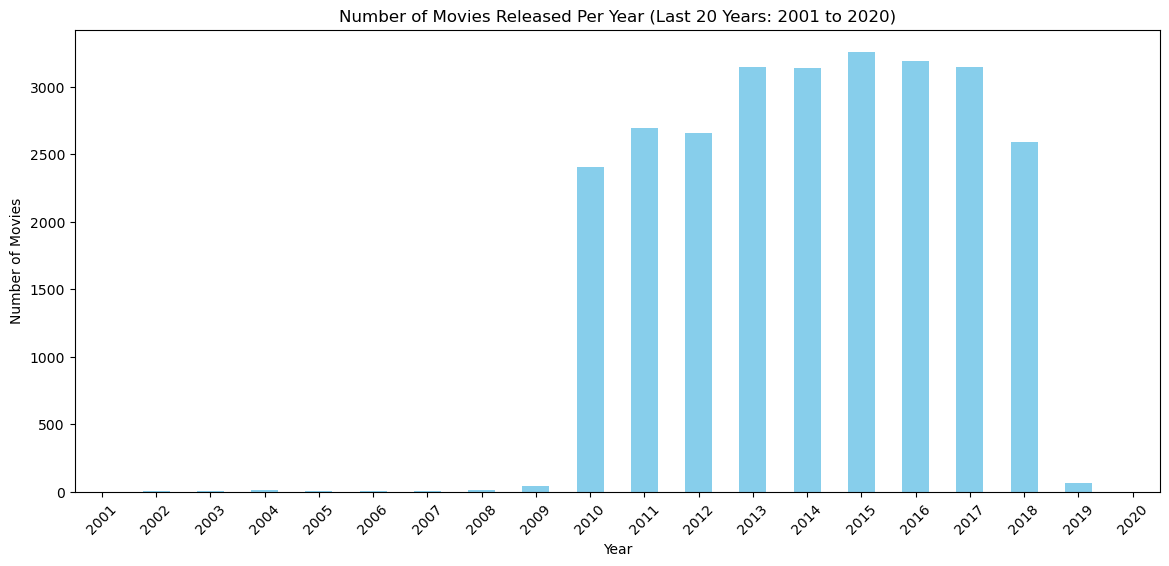

In [557]:
# Convert release_date to datetime if not already
Themovie_df['release_date'] = pd.to_datetime(Themovie_df['release_date'], errors='coerce')

# Extract release year
Themovie_df['release_year'] = Themovie_df['release_date'].dt.year

# Get the latest year in the data
latest_year = Themovie_df['release_year'].max()

# Filter for last 20 years
last_20_years = Themovie_df[(Themovie_df['release_year'] >= latest_year - 19) & (Themovie_df['release_year'] <= latest_year)]

# Count movies released each year in last 20 years
movies_per_year = last_20_years['release_year'].value_counts().sort_index()

plt.figure(figsize=(14,6))
movies_per_year.plot(kind='bar', color='skyblue')
plt.title(f'Number of Movies Released Per Year (Last 20 Years: {latest_year - 19} to {latest_year})')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45)
plt.show()

### Importance of Analyzing Movie Releases Over the Last 20 Years

- Reveals recent trends in movie production volume, helping to understand how the industry has evolved.
- Identifies periods of growth or decline that could impact strategic planning for the new studio.
- Supports informed decisions about how many movies to produce annually based on historical patterns.
- Helps anticipate market saturation or gaps in movie releases, optimizing release timing for the new project

#### 2.6 IM.BD Data Analysis

In [558]:
# Importing additional libraries to help read a compressed db file
import zipfile
import tempfile

In [559]:
# Creating a Path to your ZIP file
zip_path = r'C:\Users\Chumba\Documents\Phase 2\Group3-End-of-Phase2-Project\zippedData\im.db.zip'

# Extracting the .sqlite or .db file from the ZIP to a temp file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    # Assuming there's only one file inside the zip or you know the file name
    db_filename = zip_ref.namelist()[0]  # e.g., 'im.db'
    
    with zip_ref.open(db_filename) as zipped_db:
        with tempfile.NamedTemporaryFile(delete=False) as temp_db:
            temp_db.write(zipped_db.read())
            temp_db_path = temp_db.name

#Connecting to the SQLite database
conn = sqlite3.connect(temp_db_path)

# See what tables are available
tables_df = pd.read_sql_query("SELECT name FROM sqlite_master WHERE type='table';", conn)
print("Tables:", tables_df['name'].tolist())

#Load one table into a DataFrame (replace with actual table name if needed)
table_name = tables_df['name'][0]  # First table
df = pd.read_sql_query(f"SELECT * FROM {table_name}", conn)

# Close connection
conn.close()

# Analyze
print(df.head())

Tables: ['movie_basics', 'directors', 'known_for', 'movie_akas', 'movie_ratings', 'persons', 'principals', 'writers']
    movie_id                    primary_title              original_title  \
0  tt0063540                        Sunghursh                   Sunghursh   
1  tt0066787  One Day Before the Rainy Season             Ashad Ka Ek Din   
2  tt0069049       The Other Side of the Wind  The Other Side of the Wind   
3  tt0069204                  Sabse Bada Sukh             Sabse Bada Sukh   
4  tt0100275         The Wandering Soap Opera       La Telenovela Errante   

   start_year  runtime_minutes                genres  
0        2013            175.0    Action,Crime,Drama  
1        2019            114.0       Biography,Drama  
2        2018            122.0                 Drama  
3        2018              NaN          Comedy,Drama  
4        2017             80.0  Comedy,Drama,Fantasy  


In [560]:
# Creating a Path to your ZIP file
zip_path = r'C:\Users\Chumba\Documents\Phase 2\Group3-End-of-Phase2-Project\zippedData\im.db.zip'

# Extracting the .sqlite or .db file from the ZIP to a temp file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    # Assuming there's only one file inside the zip or you know the file name
    db_filename = zip_ref.namelist()[0]  # e.g., 'im.db'
    
    with zip_ref.open(db_filename) as zipped_db:
        with tempfile.NamedTemporaryFile(delete=False) as temp_db:
            temp_db.write(zipped_db.read())
            temp_db_path = temp_db.name

#Connecting to the SQLite database
conn = sqlite3.connect(temp_db_path)

# See what tables are available
tables_df = pd.read_sql_query("SELECT name FROM sqlite_master WHERE type='table';", conn)
print("Tables:", tables_df['name'].tolist())


Tables: ['movie_basics', 'directors', 'known_for', 'movie_akas', 'movie_ratings', 'persons', 'principals', 'writers']


From the output show above the Tables chosen for analysis will be:
* Movie_Basics
* Movie_akas
* Movie_ratings

This tables contain critical information that is similar to the ones in the previously analysed datasets and therefore will be critical in comparing the inferences arrived at from all this datasets.

In [561]:
# Writing a query to Join the selected tables  and reading the joined tables into a dataframe for easier analysis and visualization
query = """    
    SELECT  mb.movie_id, mb.primary_title, mb.original_title, mb.start_year, mb.runtime_minutes, mb.genres, 
            mr.averagerating, mr.numvotes, 
            ma.ordering, ma.title, ma.region, ma.language, ma.types, ma.attributes, ma.is_original_title
    FROM movie_basics AS mb
        JOIN movie_ratings AS mr
            ON mb.movie_id = mr.movie_id
        JOIN movie_akas AS ma
            ON mb.movie_id = ma.movie_id
"""
imdf = pd.read_sql(query, conn)


In [562]:
# closing the connection to database
conn.close()

In [563]:
# General features of the imdf
imdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261806 entries, 0 to 261805
Data columns (total 15 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   movie_id           261806 non-null  object 
 1   primary_title      261806 non-null  object 
 2   original_title     261806 non-null  object 
 3   start_year         261806 non-null  int64  
 4   runtime_minutes    250553 non-null  float64
 5   genres             260621 non-null  object 
 6   averagerating      261806 non-null  float64
 7   numvotes           261806 non-null  int64  
 8   ordering           261806 non-null  int64  
 9   title              261806 non-null  object 
 10  region             218341 non-null  object 
 11  language           37080 non-null   object 
 12  types              153268 non-null  object 
 13  attributes         12924 non-null   object 
 14  is_original_title  261806 non-null  float64
dtypes: float64(3), int64(3), object(9)
memory usage: 30

In [564]:
# Calculate percentage of null values for each column
null_percentages = imdf.isnull().mean().sort_values(ascending=False) * 100

# Create a summary DataFrame
null_summary = pd.DataFrame({
    'Column': null_percentages.index,
    'Percent Null': null_percentages.values
})

# Round to two decimal places for readability
null_summary['Percent Null'] = null_summary['Percent Null'].round(2)

# Display the summary
print(null_summary)

               Column  Percent Null
0          attributes         95.06
1            language         85.84
2               types         41.46
3              region         16.60
4     runtime_minutes          4.30
5              genres          0.45
6            movie_id          0.00
7       primary_title          0.00
8      original_title          0.00
9          start_year          0.00
10      averagerating          0.00
11           numvotes          0.00
12           ordering          0.00
13              title          0.00
14  is_original_title          0.00


#### 2.61 IMDB Dataset Summary Before Cleaning

##### Basic Info
- **Total Rows:** 261,806
- **Total Columns:** 15
- **Dataset Name:** `imdf`

---

#####  Missing Values (%)
| Column            | Percent Null |
|-------------------|--------------|
| `attributes`      | 95.06%       |
| `language`        | 85.84%       |
| `types`           | 41.46%       |
| `region`          | 16.60%       |
| `runtime_minutes` | 4.30%        |
| `genres`          | 0.45%        |
| *(Others)*        | 0.00%        |

---
##### Notes
- Majority of columns are complete and usable.
- Significant null values in `attributes` and `language` — likely candidates for dropping.
- `runtime_minutes` and `genres` have minor nulls and are important features — handle with care.
- Remaining columns are clean and ready for analysis.


##### 2.611 IMDB Data Cleaning

I this section we shall clean the data from this dataset to drop the columns with high percentage of null values , but at the same time keep columns that are critical for analysis.

In [565]:
# Identify columns with more than 30% nulls
columns_to_drop = null_percentages[null_percentages > 30].index.tolist()

# Drop those columns
imdf_reduced = imdf.drop(columns=columns_to_drop)

 # Checking the result
print(f"Dropped columns (>{30}% nulls): {columns_to_drop}")
print(f"Remaining columns: {imdf_reduced.columns.tolist()}")
print(f"New shape: {imdf_reduced.shape}")
imdf_reduced.info()

Dropped columns (>30% nulls): ['attributes', 'language', 'types']
Remaining columns: ['movie_id', 'primary_title', 'original_title', 'start_year', 'runtime_minutes', 'genres', 'averagerating', 'numvotes', 'ordering', 'title', 'region', 'is_original_title']
New shape: (261806, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261806 entries, 0 to 261805
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   movie_id           261806 non-null  object 
 1   primary_title      261806 non-null  object 
 2   original_title     261806 non-null  object 
 3   start_year         261806 non-null  int64  
 4   runtime_minutes    250553 non-null  float64
 5   genres             260621 non-null  object 
 6   averagerating      261806 non-null  float64
 7   numvotes           261806 non-null  int64  
 8   ordering           261806 non-null  int64  
 9   title              261806 non-null  object 
 10  region         

In [566]:
# Calculate percentage of null values in imdf_reduced
null_percentages_reduced = imdf_reduced.isnull().mean() * 100

# Format and display as a DataFrame
null_summary_reduced = pd.DataFrame({
    'Column': null_percentages_reduced.index,
    'Percent Null': null_percentages_reduced.values
})

null_summary_reduced['Percent Null'] = null_summary_reduced['Percent Null'].round(2)

print(null_summary_reduced)

               Column  Percent Null
0            movie_id          0.00
1       primary_title          0.00
2      original_title          0.00
3          start_year          0.00
4     runtime_minutes          4.30
5              genres          0.45
6       averagerating          0.00
7            numvotes          0.00
8            ordering          0.00
9               title          0.00
10             region         16.60
11  is_original_title          0.00


In [567]:
# Fill missing values in 'runtime_minutes' with median runtime
median_runtime = imdf_reduced['runtime_minutes'].median()
imdf_reduced['runtime_minutes'].fillna(median_runtime, inplace=True)

# Fill missing values in 'region' with a placeholder (e.g., 'Unknown')
imdf_reduced['region'].fillna('Unknown', inplace=True)

# Verify no more nulls in these columns
print(imdf_reduced[['runtime_minutes', 'region']].isnull().sum())

runtime_minutes    0
region             0
dtype: int64


In [568]:
imdf_reduced.isnull()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,ordering,title,region,is_original_title
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
261801,False,False,False,False,False,False,False,False,False,False,False,False
261802,False,False,False,False,False,False,False,False,False,False,False,False
261803,False,False,False,False,False,False,False,False,False,False,False,False
261804,False,False,False,False,False,False,False,False,False,False,False,False


The data is now clean for exploratory data analysis:
* Columns with percentage above threshold of 30% dropped.
* Rows with missing values filled with median for categorical columns
* Rows with missing values in numerical columns filled with mean.

#### 2.612 Exploratory imdb Data Analysis
We shall carry out the below visiolizations to assist in making concrete recommendations to the management on the best movie industry to venture in to.

 **Genre Performance Bar Chart**  
   - Visualize average ratings and total votes per genre to identify the most popular and well-liked film types.

 **Genre vs. Average Runtime Boxplot**  
   - Show the distribution of runtimes across genres to understand if film length influences success differently by genre.

 **Time Series: Genre Popularity Over Years**  
   - Track the number of movies released per genre over time to spot emerging trends and shifting audience preferences.

 **Scatter Plot: Average Rating vs. Number of Votes**  
   - Explore the relationship between movie quality (rating) and popularity (votes) to find the genres hitting the “sweet spot” of success.


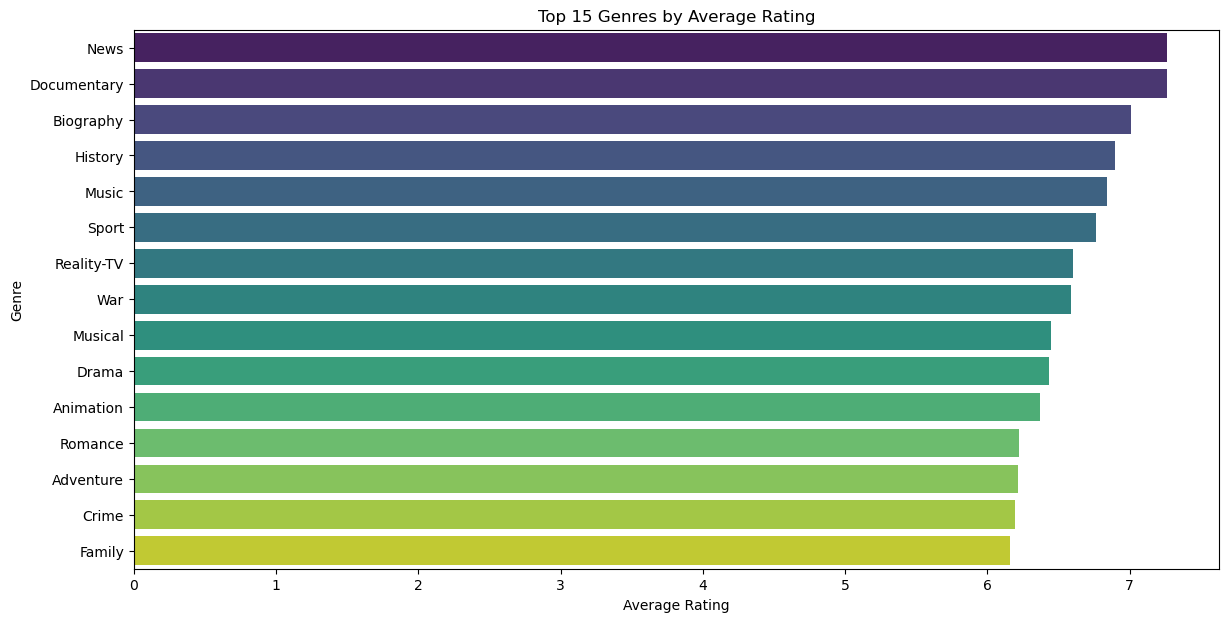

In [569]:
# Genre Performance Bar Chart (Average Rating and Total Votes)
# Explode genres (split multi-genre strings into rows)
imdf_genres = imdf_reduced.copy()
imdf_genres['genres'] = imdf_genres['genres'].str.split(',')

imdf_genres = imdf_genres.explode('genres')

# Group by genre and calculate mean rating and total votes
genre_stats = imdf_genres.groupby('genres').agg({
    'averagerating': 'mean',
    'numvotes': 'sum'
}).reset_index()

# Sort by average rating and pick top 15 genres
top_genres = genre_stats.sort_values('averagerating', ascending=False).head(15)

fig, ax1 = plt.subplots(figsize=(14, 7))

sns.barplot(x='averagerating', y='genres', data=top_genres, ax=ax1, palette='viridis')
ax1.set_xlabel('Average Rating')
ax1.set_ylabel('Genre')
ax1.set_title('Top 15 Genres by Average Rating')

plt.show()

* Genre vs Average Runtime

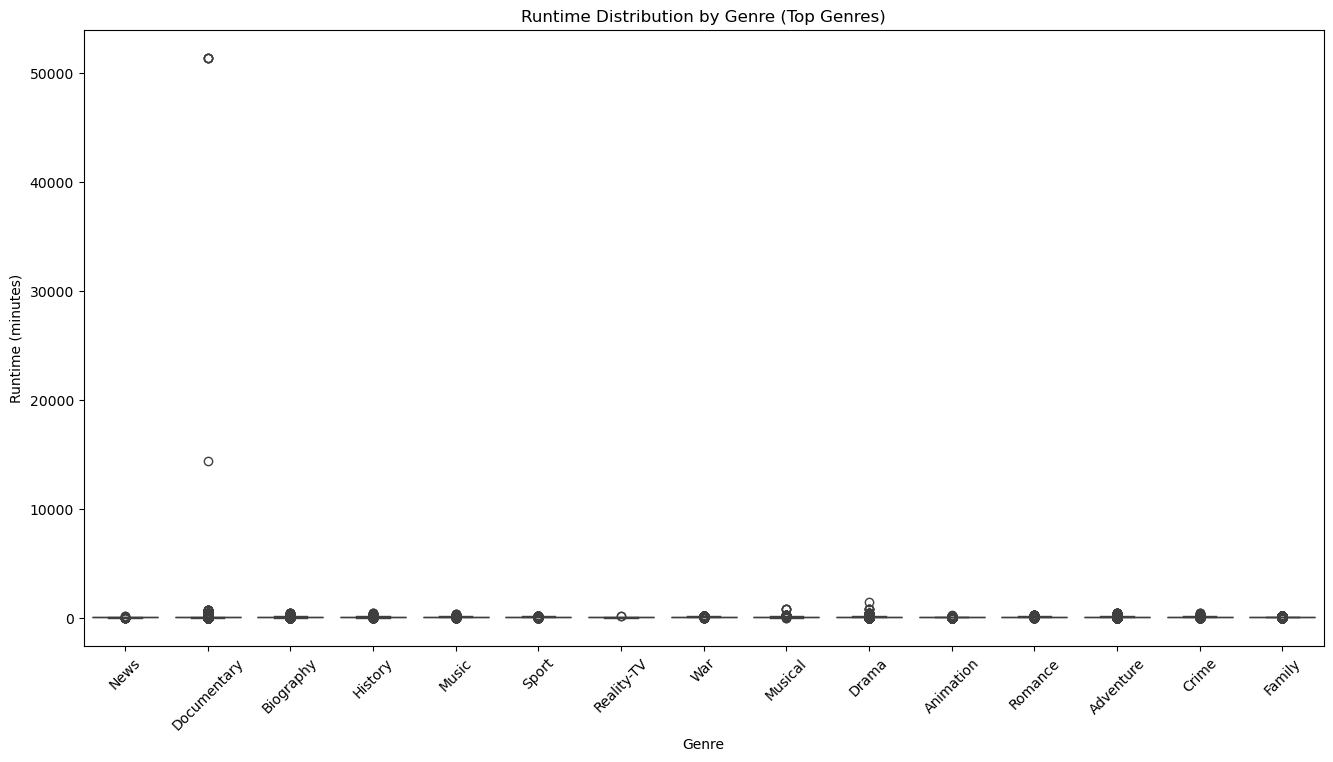

In [570]:
# Reset index to avoid duplicate index issues
imdf_genres = imdf_genres.reset_index(drop=True)

# Get unique genres for order, as before
unique_genres_order = top_genres['genres'].unique()

plt.figure(figsize=(16, 8))

sns.boxplot(x='genres', y='runtime_minutes', data=imdf_genres, order=unique_genres_order)
plt.xticks(rotation=45)
plt.title('Runtime Distribution by Genre (Top Genres)')
plt.xlabel('Genre')
plt.ylabel('Runtime (minutes)')

plt.show()

* Genres popularity over years

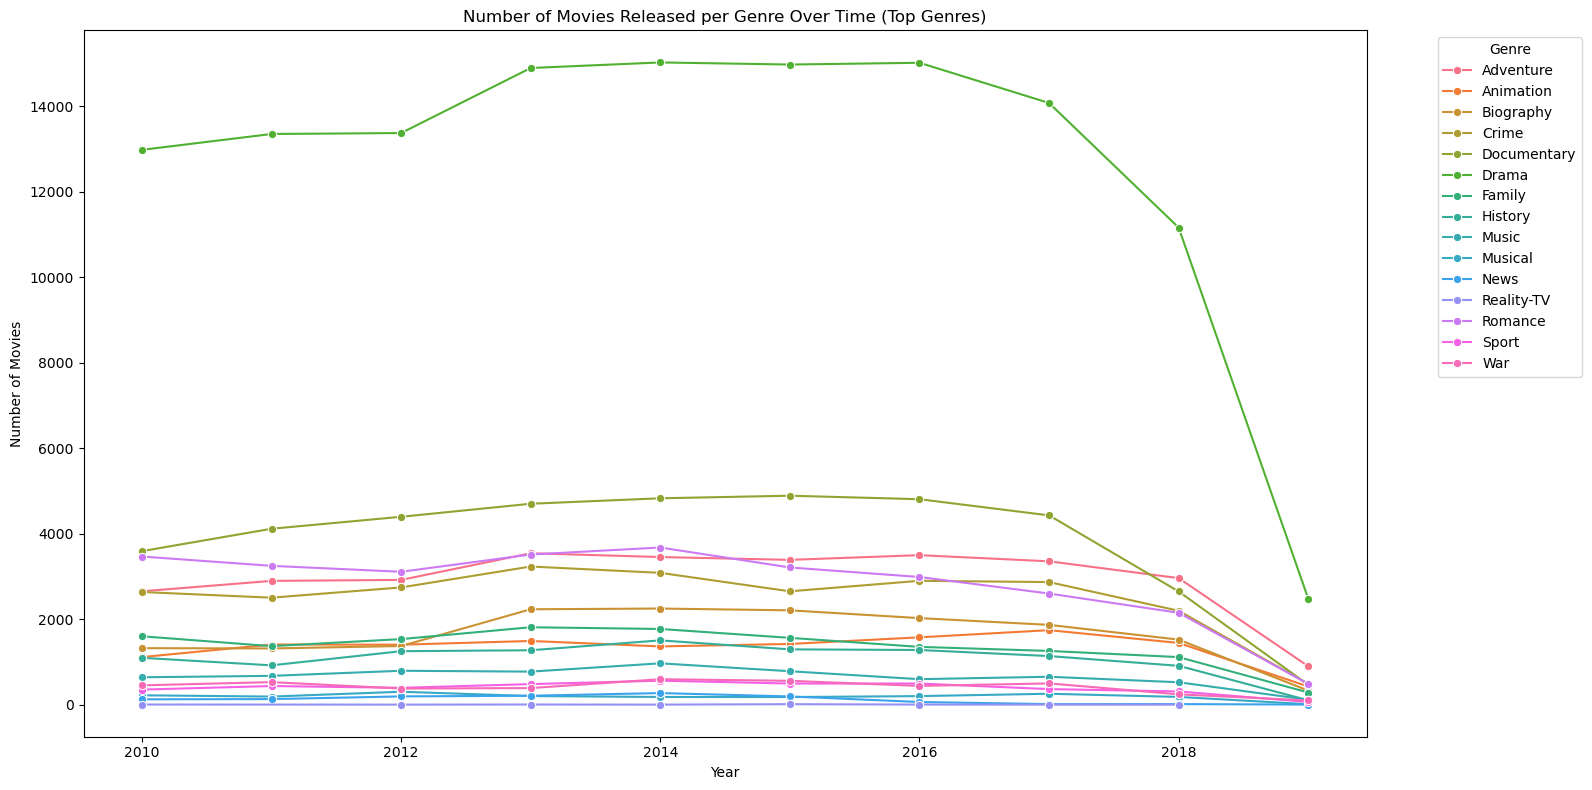

In [571]:
# Count movies per genre per year
genre_year_counts = imdf_genres.groupby(['start_year', 'genres']).size().reset_index(name='count')

# Filter top genres only for clarity
genre_year_counts = genre_year_counts[genre_year_counts['genres'].isin(top_genres['genres'])]

plt.figure(figsize=(16, 8))

sns.lineplot(data=genre_year_counts, x='start_year', y='count', hue='genres', marker='o')
plt.title('Number of Movies Released per Genre Over Time (Top Genres)')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

plt.show()

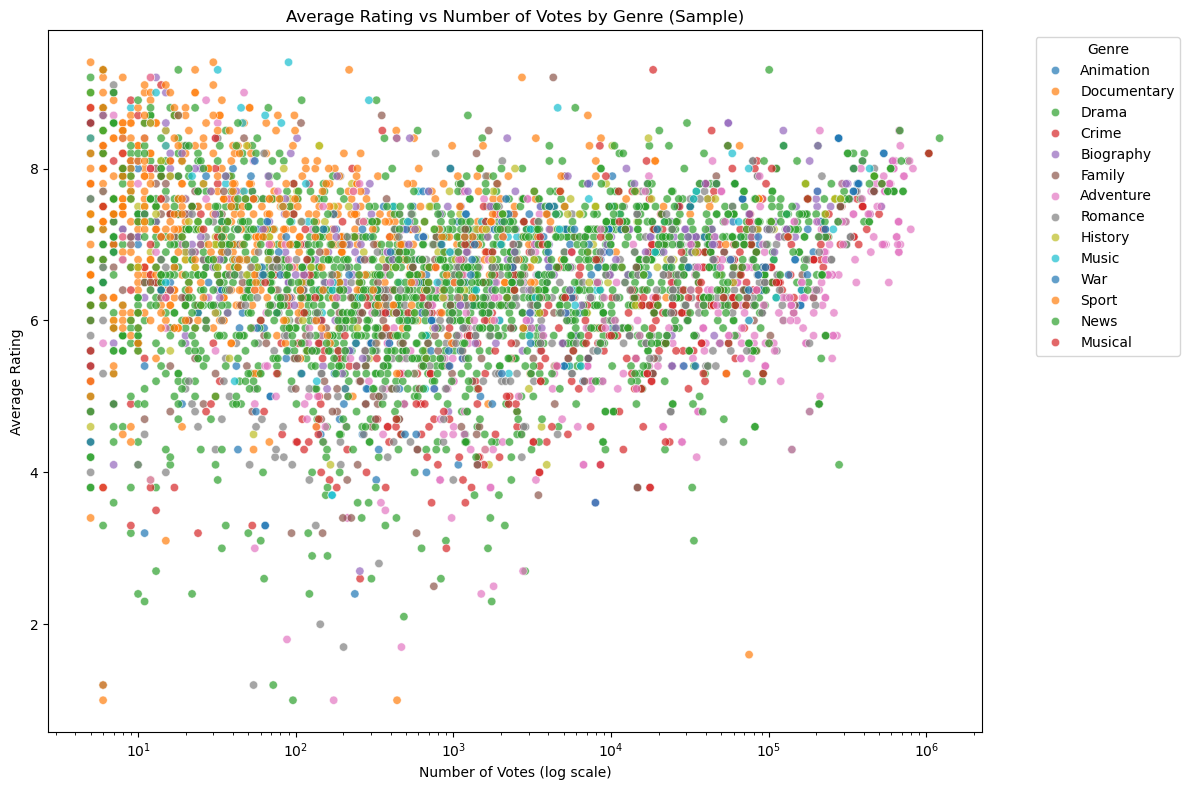

In [572]:
plt.figure(figsize=(12, 8))

# Sample to avoid overcrowding (optional)
sample = imdf_genres[imdf_genres['genres'].isin(top_genres['genres'])].sample(5000, random_state=42)

sns.scatterplot(data=sample, x='numvotes', y='averagerating', hue='genres', alpha=0.7, palette='tab10')
plt.xscale('log')
plt.title('Average Rating vs Number of Votes by Genre (Sample)')
plt.xlabel('Number of Votes (log scale)')
plt.ylabel('Average Rating')
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

plt.show()